In [ ]:
#Guassian Kernel Density Estimation

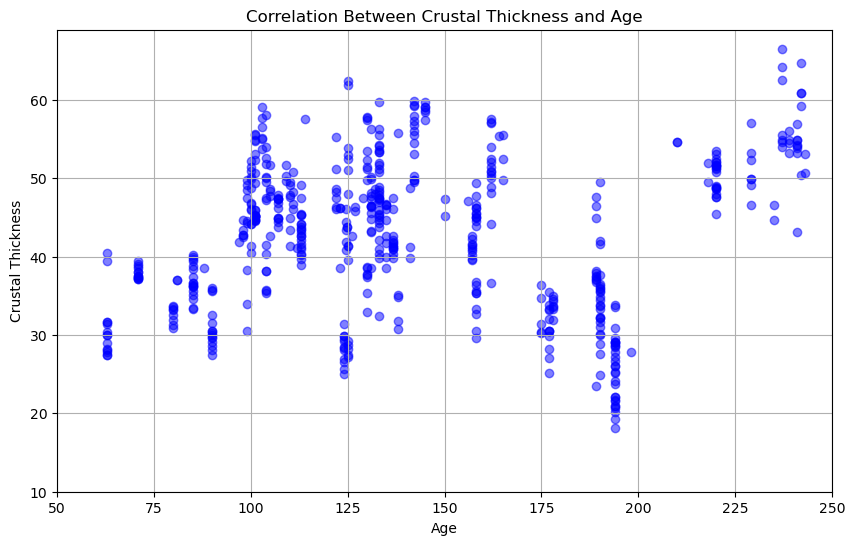

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV dataset
df = pd.read_csv("/Users/jianpingzhou/work/Papers/Ongoing/data/JP_crustal_thickness_prediction/dataset/output/SC_Book1.csv")

# Separate the columns
age = df['age']
crustal_thickness = df['Predicted_Crustal_Thickness']

# Plot the correlation between crustal thickness and age
plt.figure(figsize=(10, 6))

plt.scatter(age, crustal_thickness, color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Crustal Thickness')
plt.title('Correlation Between Crustal Thickness and Age')
plt.grid(True)
plt.ylim(10, None)
plt.xlim(50, 250)
plt.show()


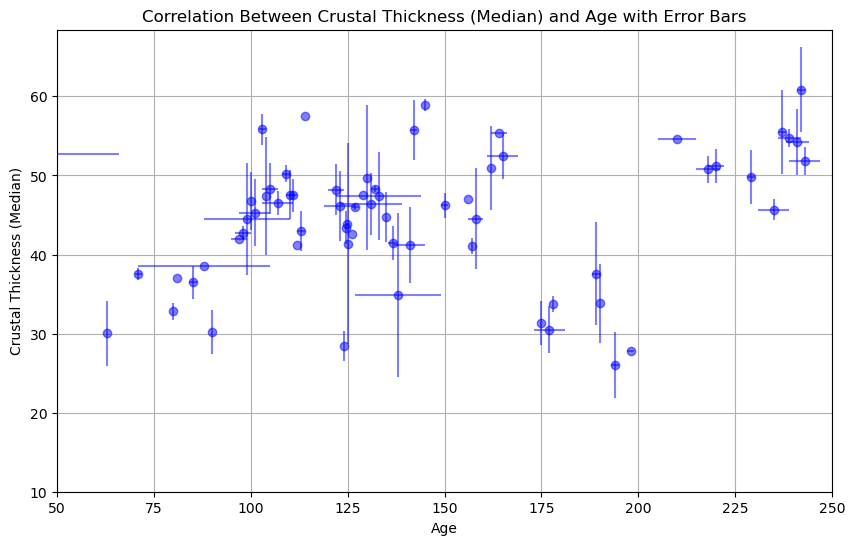

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV dataset
df = pd.read_csv("/Users/jianpingzhou/work/Papers/Ongoing/data/JP_crustal_thickness_prediction/dataset/output/SC_Book1.csv")

# Group by age and calculate median and standard deviation of crustal thickness
grouped_data = df.groupby('age')['Predicted_Crustal_Thickness'].agg(['median', 'std']).reset_index()

# Separate the columns
age = grouped_data['age']
crustal_thickness_median = grouped_data['median']
crustal_thickness_error = grouped_data['std']
age_error = df.groupby('age')['age_error'].first().values

# Plot the correlation between crustal thickness (median) and age with error bars
plt.figure(figsize=(10, 6))

plt.errorbar(age, crustal_thickness_median, xerr=age_error, yerr=crustal_thickness_error, fmt='o', color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Crustal Thickness (Median)')
plt.title('Correlation Between Crustal Thickness (Median) and Age with Error Bars')
plt.grid(True)
plt.ylim(10, None)
plt.xlim(50, 250)
plt.show()


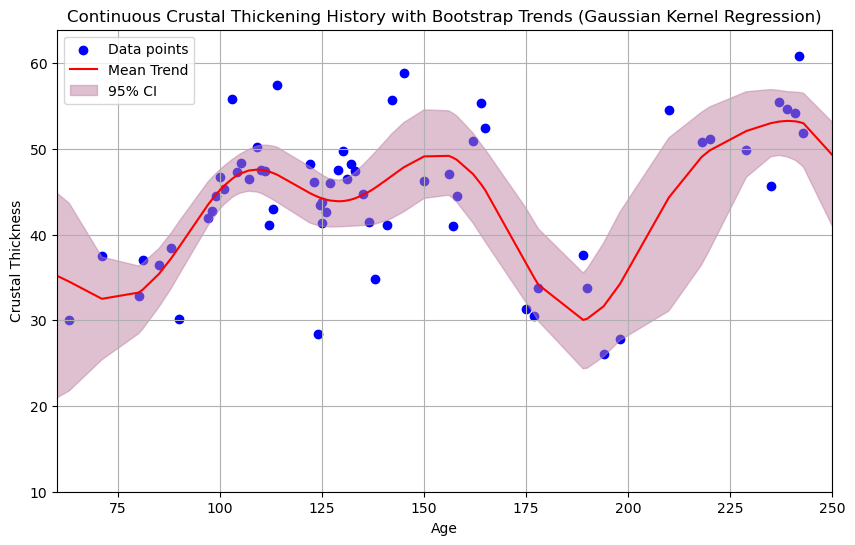

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge

# Load the CSV data
data_path = "/Users/jianpingzhou/work/Papers/Ongoing/data/JP_crustal_thickness_prediction/dataset/output/SC_Book1.csv"
df = pd.read_csv(data_path)

# Group the data by age and calculate median crustal thickness
grouped_data = df.groupby('age')['Predicted_Crustal_Thickness'].median().reset_index()

# Separate the columns
age = grouped_data['age'].values.reshape(-1, 1)
crustal_thickness = grouped_data['Predicted_Crustal_Thickness'].values

# Fit Gaussian kernel regression model with bandwidth of 10
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=1.0 / (2 * 20 ** 2))  # Using a bandwidth of 10
kr.fit(age, crustal_thickness)

# Number of bootstrap resamples
n_resamples = 10000

# Fit Gaussian kernel regression model to each bootstrap sample
predicted_trends = []
for _ in range(n_resamples):
    # Generate bootstrap sample
    bootstrap_indices = np.random.choice(len(age), size=len(age), replace=True)
    age_bootstrap = age[bootstrap_indices]
    crustal_thickness_bootstrap = crustal_thickness[bootstrap_indices]
    
    # Fit Gaussian kernel regression model to the bootstrap sample
    kr_bootstrap = KernelRidge(kernel='rbf', alpha=0.1, gamma=1.0 / (2 * 20 ** 2))  # Using the same parameters as before
    kr_bootstrap.fit(age_bootstrap, crustal_thickness_bootstrap)
    
    # Predict crustal thickness using the fitted model
    crustal_thickness_predicted = kr_bootstrap.predict(age)
    predicted_trends.append(crustal_thickness_predicted)

# Calculate mean trend and confidence intervals
predicted_trends = np.array(predicted_trends)
mean_trend = np.mean(predicted_trends, axis=0)
lower_bound = np.percentile(predicted_trends, 2.5, axis=0)
upper_bound = np.percentile(predicted_trends, 97.5, axis=0)

# Plot the mean trend with confidence intervals
plt.figure(figsize=(10, 6))
plt.scatter(age, crustal_thickness, color='blue', label='Data points')
plt.plot(age, mean_trend, color='red', label='Mean Trend')
plt.fill_between(age.flatten(), lower_bound, upper_bound, color='#BF83A5', alpha=0.5, label='95% CI')
plt.xlabel('Age')
plt.ylabel('Crustal Thickness')
plt.title('Continuous Crustal Thickening History with Bootstrap Trends (Gaussian Kernel Regression)')
plt.legend()
plt.grid(True)
plt.ylim(10, None)
plt.xlim(60, 250)
plt.show()


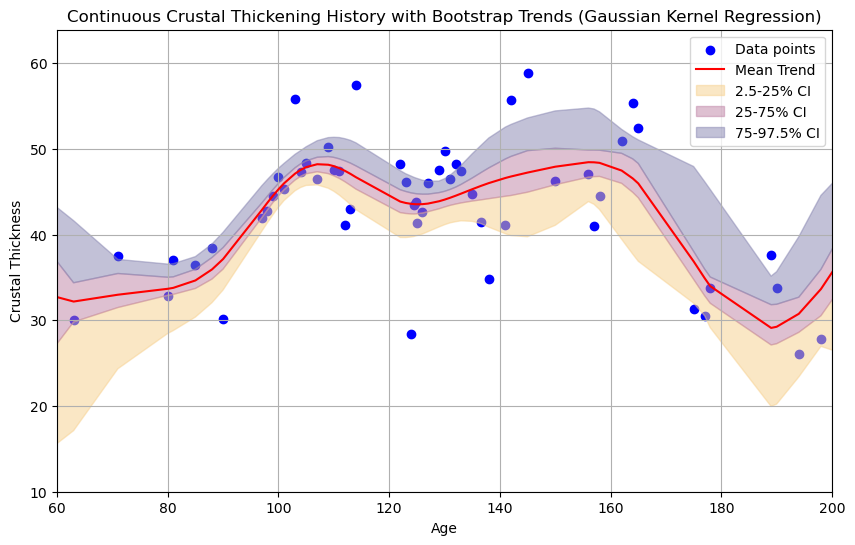

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge

# Load the CSV data
data_path = "/Users/jianpingzhou/work/Papers/Ongoing/data/JP_crustal_thickness_prediction/dataset/output/SC_Book1.csv"
df = pd.read_csv(data_path)

# Group the data by age and calculate median crustal thickness
grouped_data = df.groupby('age')['Predicted_Crustal_Thickness'].median().reset_index()

# Separate the columns
age = grouped_data['age'].values.reshape(-1, 1)
crustal_thickness = grouped_data['Predicted_Crustal_Thickness'].values

# Fit Gaussian kernel regression model with bandwidth of 10
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=1.0 / (2 * 15 ** 2))  # Using a bandwidth of 10
kr.fit(age, crustal_thickness)

# Number of bootstrap resamples
n_resamples = 10000

# Fit Gaussian kernel regression model to each bootstrap sample
predicted_trends = []
for _ in range(n_resamples):
    # Generate bootstrap sample
    bootstrap_indices = np.random.choice(len(age), size=len(age), replace=True)
    age_bootstrap = age[bootstrap_indices]
    crustal_thickness_bootstrap = crustal_thickness[bootstrap_indices]
    
    # Fit Gaussian kernel regression model to the bootstrap sample
    kr_bootstrap = KernelRidge(kernel='rbf', alpha=0.1, gamma=1.0 / (2 * 15 ** 2))  # Using the same parameters as before
    kr_bootstrap.fit(age_bootstrap, crustal_thickness_bootstrap)
    
    # Predict crustal thickness using the fitted model
    crustal_thickness_predicted = kr_bootstrap.predict(age)
    predicted_trends.append(crustal_thickness_predicted)

# Calculate mean trend and confidence intervals
predicted_trends = np.array(predicted_trends)
mean_trend = np.mean(predicted_trends, axis=0)
lower_bound = np.percentile(predicted_trends, 2.5, axis=0)
upper_bound = np.percentile(predicted_trends, 97.5, axis=0)

# Plot the mean trend with confidence intervals
plt.figure(figsize=(10, 6))
plt.scatter(age, crustal_thickness, color='blue', label='Data points')
plt.plot(age, mean_trend, color='red', label='Mean Trend')

# Define different percentile ranges for uncertainty
percentiles = [(2.5, 25, '#F7D08D'), (25, 75, '#BF83A5'), (75, 97.5, '#8684B0')]

# Plot confidence intervals with different colors
for lower, upper, color in percentiles:
    lower_bound = np.percentile(predicted_trends, lower, axis=0)
    upper_bound = np.percentile(predicted_trends, upper, axis=0)
    plt.fill_between(age.flatten(), lower_bound, upper_bound, color=color, alpha=0.5, label=f'{lower}-{upper}% CI')

plt.xlabel('Age')
plt.ylabel('Crustal Thickness')
plt.title('Continuous Crustal Thickening History with Bootstrap Trends (Gaussian Kernel Regression)')
plt.legend()
plt.grid(True)
plt.ylim(10, None)
plt.xlim(60, 200)
plt.show()

